In [1]:
import pandas as pd
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from utils import load_dataframe
from mappings import get_element_mapping, get_item_mapping, get_area_mapping
import numpy as np
%load_ext autoreload
%autoreload 2

### Reshape the dataframe

First check which country codes to keep. Here we keep all countries that are in the group `World`, and also add the country code 5000 which corresponds to `World`

In [30]:
df = load_dataframe("data/emissions_agriculture/Emissions_Agriculture_Agriculture_total_E_All_Data_(Normalized).csv") # Loads and renames columns
element_mapping = get_element_mapping(df)  
item_mapping = get_item_mapping(df)
area_mapping = get_area_mapping(df)

In [31]:
#element_mapping

In [32]:
country_groups = pd.read_csv("data/country_groups.csv") # This dataframe contains the countries contained in each group (only pick )
country_codes = np.append(country_groups[country_groups['Country Group'] == "World"]['Country Code'].unique(), 5000)

#df = df[df.areacode.isin(country_codes)] # Keep only those country codes

1. Check if elements or items are redundant (i.e. if one contains the other)

In [33]:
#element_mapping

In [34]:
#item_mapping

Here `Agriculture total` represents the total of all countries

In [7]:
area_mapping = area_mapping[area_mapping.areacode.isin(country_codes)]

This functions checks if any item names are contained in other items

In [8]:
to_drop = set()
for i in item_mapping.item.values:
    contain = item_mapping[(item_mapping.item != i) & (item_mapping.item.str.contains(i))].item.values
    for c in contain:
        if c not in to_drop:
            to_drop.add(c)
to_drop

set()

In [9]:
df = df[~df.item.isin(to_drop)]

In [111]:
df = df[df.year < 2020]

In [35]:
from utils import reshape_dataframe

df = reshape_dataframe(df, element_mapping)

In [36]:
df.head()

,area,item,year,Emissions (CH4) (gigagrams),Emissions (N2O) (gigagrams),Emissions (CO2eq) (gigagrams),Emissions (CO2eq) from N2O (gigagrams),Emissions (CO2eq) from CH4 (gigagrams)
0,Afghanistan,Agricultural Soils,1961,NaN,NaN,3097.8213,3097.8213,NaN
1,Afghanistan,Agricultural Soils,1962,NaN,NaN,3063.8992,3063.8992,NaN
2,Afghanistan,Agricultural Soils,1963,NaN,NaN,3116.2194,3116.2194,NaN
3,Afghanistan,Agricultural Soils,1964,NaN,NaN,3181.7806,3181.7806,NaN
4,Afghanistan,Agricultural Soils,1965,NaN,NaN,3257.1703,3257.1703,NaN


In [1]:
import ipywidgets as widgets
items = df.item.unique()
elements = df.columns[3:]
areas = df.area.unique()
item_select = widgets.Dropdown(
    options=items,
    value=items[0],
    description='Item:',
    disabled=False,
)

element_select = widgets.Dropdown(
    options=elements,
    value=elements[0],
    description='Element:',
    disabled=False,
)

area_select = widgets.Dropdown(
    options=areas,
    value=areas[0],
    description='Area:',
    disabled=False,
)
items = [item_select, element_select, area_select]
selector = widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(3, 300px)"))

NameError: name 'df' is not defined

In [106]:
df.head()

,area,item,year,Emissions (CH4) (gigagrams),Emissions (N2O) (gigagrams),Emissions (CO2eq) (gigagrams),Emissions (CO2eq) from N2O (gigagrams),Emissions (CO2eq) from CH4 (gigagrams)
0,Afghanistan,Agricultural Soils,1961,NaN,NaN,3097.8213,3097.8213,NaN
1,Afghanistan,Agricultural Soils,1962,NaN,NaN,3063.8992,3063.8992,NaN
2,Afghanistan,Agricultural Soils,1963,NaN,NaN,3116.2194,3116.2194,NaN
3,Afghanistan,Agricultural Soils,1964,NaN,NaN,3181.7806,3181.7806,NaN
4,Afghanistan,Agricultural Soils,1965,NaN,NaN,3257.1703,3257.1703,NaN


In [109]:
sns.set_palette(sns.color_palette("tab20c", 20))

In [112]:
from IPython.display import display, clear_output
from ipywidgets import Output

out = Output()

@out.capture()
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        fig, ax = plt.subplots(figsize=(20, 10))
        data = df[(df['area'] == area_select.get_interact_value()) & (df['item'] == item_select.get_interact_value())] 
        sns.lineplot(x='year', y=element_select.get_interact_value(), data=data, ax=ax)
        plt.show()
        
item_select.observe(on_change, names=['value'])
element_select.observe(on_change, names=['value'])
area_select.observe(on_change, names=['value'])

display(selector)
display(out)

GridBox(children=(Dropdown(description='Item:', index=2, options=('Agricultural Soils', 'Agriculture total', '…

Output()

### Plot evolution of world data

In [14]:
from utils import percentage_of_total
df_world = df[df.area == "World"]
df_world = percentage_of_total(df_world, "Agriculture total", "Emissions (CO2eq) (gigagrams)")

/home/tarek/anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/tarek/anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
palette = dict(zip(df_world.item.unique(), sns.color_palette()))

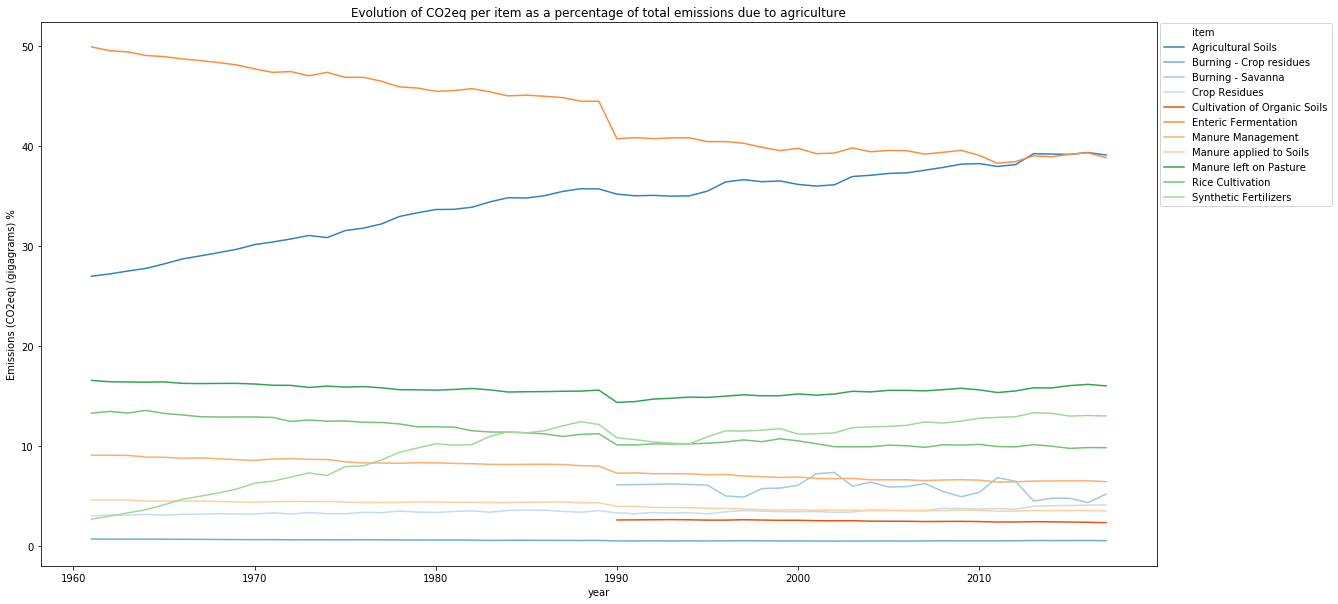

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
g = sns.lineplot(data=df_world[(df_world.year < 2020) & (df_world.item != "Agriculture total")], x='year', y='Emissions (CO2eq) (gigagrams) %', hue="item", ax=ax)#.plot(x='year', y='Emissions (CH4) (Enteric) (gigagrams)')
ax.legend(loc='center', bbox_to_anchor=(1.08, 0.83), ncol=1)
ax.set_title("Evolution of CO2eq per item as a percentage of total emissions due to agriculture");

In [17]:
def plot_histogram(year=2017):
    
    fig, ax = plt.subplots(figsize=(20,10))
    dataframe = df_world[df_world.year == year]
    sns.barplot(x='item', y='Emissions (CO2eq) (gigagrams) %', data=dataframe[dataframe.item != "Agriculture total"].sort_values("Emissions (CO2eq) (gigagrams) %", ascending=False), palette=palette)
    ax.set_title(f"Emissions (CO2eq) (gigagrams) for {year}")
    plt.xticks(rotation=45);

In [18]:
from ipywidgets import interact
interact(plot_histogram, year=(1970, 2017, 1))

interactive(children=(IntSlider(value=2017, description='year', max=2017, min=1970), Output()), _dom_classes=(…

<function __main__.plot_histogram(year=2017)>

In [19]:
item_mapping

,itemcode,item
0,5058,Enteric Fermentation
177,5059,Manure Management
472,5060,Rice Cultivation
649,5061,Synthetic Fertilizers
826,5062,Manure applied to Soils
1003,5063,Manure left on Pasture
1180,5064,Crop Residues
1357,5066,Burning - Crop residues
1652,5067,Burning - Savanna
1802,1711,Agriculture total


In [47]:
test = load_dataframe("data/emissions_agriculture/Emissions_Agriculture_Energy_E_All_Data_(Norm).csv")
test = test.rename({"countrycode": "areacode", "country": "area"}, axis=1)
test_e_mapping = get_element_mapping(test)

test = reshape_dataframe(test, test_e_mapping)

In [50]:
test_e_mapping

,elementcode,element,unit
0,72184,Consumption in Agriculture,Terajoule
27,719610,Implied emission factor for CH4,Kg/TJ
54,722510,Emissions (CH4) (Energy),Gigagrams
81,724410,Emissions (CO2eq) from CH4 (Energy),Gigagrams
108,719710,Implied emission factor for N2O,Kg/TJ
135,723010,Emissions (N2O) (Energy),Gigagrams
162,724310,Emissions (CO2eq) from N2O (Energy),Gigagrams
189,719510,Implied emission factor for CO2,Kg/TJ
216,719410,Emissions (CO2) (Energy),Gigagrams
243,723110,Emissions (CO2eq) (Energy),Gigagrams


In [51]:
test.item.unique()

array(['Electricity', 'Energy for power irrigation', 'Total Energy',
       'Coal', 'Energy used in fishery', 'Fuel oil',
       'Fuel oil used in fisheries', 'Gas-Diesel oil',
       'Gas-diesel oils used in fisheries',
       'Liquefied petroleum gas (LPG)', 'Motor Gasoline',
       'Natural gas (including LNG)',
       'Transport fuel used in agriculture (excl. fishery)'], dtype=object)

In [55]:
test[(test.item == "Total Energy") & (test.area == "World") & (test.year == 1970)]

,area,item,year,Consumption in Agriculture (million kWh),Consumption in Agriculture (Terajoule),Emissions (CO2) (Energy) (Gigagrams),Implied emission factor for CO2 (g/kWh),Implied emission factor for CO2 (Kg/TJ),Implied emission factor for CH4 (Kg/TJ),Implied emission factor for N2O (Kg/TJ),Emissions (CH4) (Energy) (Gigagrams),Emissions (N2O) (Energy) (Gigagrams),Emissions (CO2eq) (Energy) (Gigagrams),Emissions (CO2eq) from N2O (Energy) (Gigagrams),Emissions (CO2eq) from CH4 (Energy) (Gigagrams)
58464,World,Total Energy,1970,NaN,1520352.2,108469.2831,NaN,NaN,NaN,NaN,108.7525,24.9224,118479.0311,7725.9458,2283.8021


In [ ]:
df[(df.item == "")]